![Python Logo](./img/python-logo-master-v3-TM-flattened_small.png)

# Financial Programming - IÉSEG, Lille - MBD 2019-2020
## Group Project -  EDUARDO ALFONSO RAZO, SUBHAMOY DAM, CHENXIN  XIE

In [427]:
first_name = ''
last_name = ''

### Data Preparation

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

**Account**

In [2]:
# Each record describes static characteristics of an account
account = pd.read_csv('./data_berka/account.asc', sep=';')
account.head()

,account_id,district_id,frequency,date
0,576,55,POPLATEK MESICNE,930101
1,3818,74,POPLATEK MESICNE,930101
2,704,55,POPLATEK MESICNE,930101
3,2378,16,POPLATEK MESICNE,930101
4,2632,24,POPLATEK MESICNE,930102


**District**

In [3]:
# Each record describes demographic characteristics of a district.
district = pd.read_csv('./data_berka/district.asc', sep=';')
district.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040


In [4]:
#Renaming column names
district.rename(columns={'A4':'num_of_inhabitants', 
                         'A5':'num_of_municipalities_with_inhabitants_lt_499',
                         'A6':'num_of_municipalities_with_inhabitants_bt_500_and_1999',
                         'A7':'num_of_municipalities_with_inhabitants_bt_2000_and_9999',
                         'A8':'num_of_municipalities_with_inhabitants_gt_10000',
                         'A9':'num_of_cities',
                         'A10':'ratio_of_urban_inhabitants',
                         'A11':'average_salary_of_region',
                         'A12':'unemployment_rate_of_1995',
                         'A13':'unemployment_rate_of_1996',
                         'A14':'num_of_entrepreneurs_per_1000_inhabitants',
                         'A15':'num_of_committed_crimes_of_1995',
                         'A16':'num_of_committed_crimes_of_1996',
                        },inplace=True)
district.columns

Index(['A1', 'A2', 'A3', 'num_of_inhabitants',
       'num_of_municipalities_with_inhabitants_lt_499',
       'num_of_municipalities_with_inhabitants_bt_500_and_1999',
       'num_of_municipalities_with_inhabitants_bt_2000_and_9999',
       'num_of_municipalities_with_inhabitants_gt_10000', 'num_of_cities',
       'ratio_of_urban_inhabitants', 'average_salary_of_region',
       'unemployment_rate_of_1995', 'unemployment_rate_of_1996',
       'num_of_entrepreneurs_per_1000_inhabitants',
       'num_of_committed_crimes_of_1995', 'num_of_committed_crimes_of_1996'],
      dtype='object')

In [5]:
#Merging account and district
left_table = account
right_table = district[["A1", "A2", "A3"]]

account_district = pd.merge(left_table,
        right_table,
        how= "left",
        left_on='district_id', right_on='A1').sort_values('account_id')

#Renaming column names
account_district.rename(columns={'date':'Account_created_date', 'A2':'Account_district_name', 'A3':"Account_Region"},inplace=True)

#Changing to datetime type
account_district['Account_created_date'] = account_district['Account_created_date'].astype(str)
account_district['Account_created_date'] = pd.to_datetime(account_district['Account_created_date'])

#Eliminating duplicated column A1 (district_id)
account_district = account_district.drop("A1", axis=1)

In [6]:
#creating dummies for frequency
dummies = pd.get_dummies(account_district['frequency']).rename(columns=lambda x: 'frequency_' + str(x))
account_district = pd.concat([account_district, dummies], axis=1)

In [7]:
#combing region names for Bohenia and Morvia
account_district.Account_Region[account_district['Account_Region']=='central Bohemia'] = 'Bohemia'
account_district.Account_Region[account_district['Account_Region']=='east Bohemia'] = 'Bohemia'
account_district.Account_Region[account_district['Account_Region']=='north Bohemia'] = 'Bohemia'
account_district.Account_Region[account_district['Account_Region']=='south Bohemia'] = 'Bohemia'
account_district.Account_Region[account_district['Account_Region']=='west Bohemia'] = 'Bohemia'
account_district.Account_Region[account_district['Account_Region']=='north Moravia'] = 'Moravia'
account_district.Account_Region[account_district['Account_Region']=='south Moravia'] = 'Moravia'

C:\Users\cxie\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\cxie\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\cxie\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_gui

In [8]:
#creating dummies for Region
dummies = pd.get_dummies(account_district['Account_Region']).rename(columns=lambda x: 'Account_Region_' + str(x))
account_district = pd.concat([account_district, dummies], axis=1)


In [9]:
#Renaming column names
account_district.rename(columns={'frequency_POPLATEK MESICNE':'Issuance_monthly', 
                                 'frequency_POPLATEK PO OBRATU':'Issuance_after_transaction', 
                                 'frequency_POPLATEK TYDNE':"Issuance_weekly"},
                        inplace=True)

In [10]:
account_district.head()

,account_id,district_id,frequency,Account_created_date,Account_district_name,Account_Region,Issuance_monthly,Issuance_after_transaction,Issuance_weekly,Account_Region_Bohemia,Account_Region_Moravia,Account_Region_Prague
1720,1,18,POPLATEK MESICNE,1995-03-24,Pisek,Bohemia,1,0,0,1,0,0
182,2,1,POPLATEK MESICNE,1993-02-26,Hl.m. Praha,Prague,1,0,0,0,0,1
4072,3,5,POPLATEK MESICNE,1997-07-07,Kolin,Bohemia,1,0,0,1,0,0
2426,4,12,POPLATEK MESICNE,1996-02-21,Pribram,Bohemia,1,0,0,1,0,0
3976,5,15,POPLATEK MESICNE,1997-05-30,Cesky Krumlov,Bohemia,1,0,0,1,0,0


**Credit card**

In [11]:
# Each record describes a credit card issued to an account
card = pd.read_csv('./data_berka/card.asc', sep=';')
card.head()

,card_id,disp_id,type,issued
0,1005,9285,classic,931107 00:00:00
1,104,588,classic,940119 00:00:00
2,747,4915,classic,940205 00:00:00
3,70,439,classic,940208 00:00:00
4,577,3687,classic,940215 00:00:00


In [12]:
#Creating dummies for 'type' column
card_dummies = pd.get_dummies(card['type'])

# Adding columns (disponent and owner) in disp
cards = pd.concat([card, card_dummies], axis=1, sort=False)

#Renaming column names
cards.rename(columns={'type':'card_type','issued':'Card_issued_date', 'classic':'Classic_card','gold':'Gold_card','junior':'Junior_card'},inplace=True)

#Changing to datetime type
cards['Card_issued_date'] = cards['Card_issued_date'].astype(str)
cards['Card_issued_date'] = pd.to_datetime(cards['Card_issued_date'])

In [13]:
cards.head()

,card_id,disp_id,card_type,Card_issued_date,Classic_card,Gold_card,Junior_card
0,1005,9285,classic,1993-11-07,1,0,0
1,104,588,classic,1994-01-19,1,0,0
2,747,4915,classic,1994-02-05,1,0,0
3,70,439,classic,1994-02-08,1,0,0
4,577,3687,classic,1994-02-15,1,0,0


**Disposition**

In [14]:
# Each record relates together a client with an account i.e. this relation describes the rights
# of clients to operate accounts
disp = pd.read_csv('./data_berka/disp.asc', sep=';')
disp.head()

,disp_id,client_id,account_id,type
0,1,1,1,OWNER
1,2,2,2,OWNER
2,3,3,2,DISPONENT
3,4,4,3,OWNER
4,5,5,3,DISPONENT


In [15]:
#change value in type, prepare for creating dummies
disp.type[disp.type == 'OWNER'] = 'Is_Owner'
disp.type[disp.type == 'DISPONENT'] = 'Is_Disponent'
#rename column type
disp.rename(columns={'type':'Disposition_type'}, inplace=True)
# Getting dummies in 'type'
disp_dummies = pd.get_dummies(disp['Disposition_type'])
# Adding columns (disponent and owner) in disp
disp = pd.concat([disp, disp_dummies], axis=1, sort=False)

C:\Users\cxie\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\cxie\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
disp.head()

,disp_id,client_id,account_id,Disposition_type,Is_Disponent,Is_Owner
0,1,1,1,Is_Owner,0,1
1,2,2,2,Is_Owner,0,1
2,3,3,2,Is_Disponent,1,0
3,4,4,3,Is_Owner,0,1
4,5,5,3,Is_Disponent,1,0


**Permanent Order**

In [21]:
# Each record describes characteristics of a payment order
order = pd.read_csv('./data_berka/order.asc', sep=';')
order.head()

,order_id,account_id,bank_to,account_to,amount,k_symbol
0,29401,1,YZ,87144583,2452.0,SIPO
1,29402,2,ST,89597016,3372.7,UVER
2,29403,2,QR,13943797,7266.0,SIPO
3,29404,3,WX,83084338,1135.0,SIPO
4,29405,3,CD,24485939,327.0,


In [22]:
# Assigning meaningful names in k_symbol column 
order.k_symbol[order.k_symbol == 'POJISTNE'] = 'Insurance'
order.k_symbol[order.k_symbol == 'SIPO'] = 'Household'
order.k_symbol[order.k_symbol == 'LEASING'] = 'Leasing'
order.k_symbol[order.k_symbol == 'UVER'] = 'Loan'
order.k_symbol[order.k_symbol == ' '] = 'Others'

C:\Users\cxie\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\cxie\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\cxie\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_gui

In [23]:
#Renaming column names
order.rename(columns={'bank_to':'Recipient_bank', 'account_to':'Recipient_account', 'amount':'Debited_amount', 'k_symbol':'Payment_purpose'},inplace=True)

#Pivot order amonut for 'Recipient_bank' columns
order_pvb =pd.pivot_table(order, values='Debited_amount', 
                          index='account_id', 
                          columns=['Recipient_bank'], 
                          aggfunc=np.sum,dropna= False ,
                          fill_value = 0)

#Pivot oder amont for 'Payment_purpose' columns
order_pvp = pd.pivot_table(order, values='Debited_amount', 
                          index='account_id', 
                          columns=['Payment_purpose'], 
                          aggfunc=np.sum,dropna= False ,
                          fill_value = 0)

In [24]:
#Merging the created variables together
order_final = pd.merge(order_pvb, order_pvp, 
                   how= "left",
                   left_on='account_id', right_on='account_id')
order_final=pd.DataFrame(order_final)

In [25]:
order_final

,AB,CD,EF,GH,IJ,KL,MN,OP,QR,ST,UV,WX,YZ,Household,Insurance,Leasing,Loan,Others
account_id,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2452.0,2452,0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7266.0,3372.7,0.0,0.0,0.0,7266,0,0.0,3372.7,0
3,3539.0,327.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1135.0,0.0,1135,3539,0.0,0.0,327
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3363.0,0.0,0.0,3363,0,0.0,0.0,0
5,0.0,0.0,0.0,2668.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2668,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4674.0,0,0,0.0,4674.0,0
11333,0.0,0.0,0.0,0.0,3286.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,3286.7,0.0,0
11349,0.0,0.0,0.0,10886.0,0.0,6998.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10886,0,0.0,6998.0,0


In [26]:
order_final=order_final.rename(columns={"AB":"Order_Recipient_Bank_AB","CD":"Order_Recipient_Bank_CD",
                            "EF":"Order_Recipient_Bank_EF","GH":"Order_Recipient_Bank_GH",
                            "IJ":"Order_Recipient_Bank_IJ","KL":"Order_Recipient_Bank_KL",
                            "MN":"Order_Recipient_Bank_MN","OP":"Order_Recipient_Bank_OP",
                            "QR":"Order_Recipient_Bank_QR","ST":"Order_Recipient_Bank_ST",
                            "UV":"Order_Recipient_Bank_UV","WX":"Order_Recipient_Bank_WX",
                            "YZ":"Order_Recipient_Bank_YZ", "Household":"Order_Purpose_HouseHold",
                            "Insurance":"Order_Purpose_Insurance","Leasing":"Order_Purpose_Leasing",
                            "Loan":"Order_Purpose_Loan","Others":"Order_Purpose_Others"})
order_final.head()

,Order_Recipient_Bank_AB,Order_Recipient_Bank_CD,Order_Recipient_Bank_EF,Order_Recipient_Bank_GH,Order_Recipient_Bank_IJ,Order_Recipient_Bank_KL,Order_Recipient_Bank_MN,Order_Recipient_Bank_OP,Order_Recipient_Bank_QR,Order_Recipient_Bank_ST,Order_Recipient_Bank_UV,Order_Recipient_Bank_WX,Order_Recipient_Bank_YZ,Order_Purpose_HouseHold,Order_Purpose_Insurance,Order_Purpose_Leasing,Order_Purpose_Loan,Order_Purpose_Others
account_id,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2452.0,2452,0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7266.0,3372.7,0.0,0.0,0.0,7266,0,0.0,3372.7,0
3,3539.0,327.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1135.0,0.0,1135,3539,0.0,0.0,327
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3363.0,0.0,0.0,3363,0,0.0,0.0,0
5,0.0,0.0,0.0,2668.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2668,0,0.0,0.0,0


**Transaction**

In [27]:
# Each record describes one transaction on an account
trans = pd.read_csv('./data_berka/trans.asc', sep=';',low_memory=False)
trans.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,695247,2378,930101,PRIJEM,VKLAD,700.0,700.0,NaN,NaN,NaN
1,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN
2,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,NaN,NaN,NaN
3,1117247,3818,930101,PRIJEM,VKLAD,600.0,600.0,NaN,NaN,NaN
4,579373,1972,930102,PRIJEM,VKLAD,400.0,400.0,NaN,NaN,NaN


In [28]:
trans['k_symbol'].sort_values

<bound method Series.sort_values of 0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
           ... 
1056315    UROK
1056316    UROK
1056317    UROK
1056318    UROK
1056319    UROK
Name: k_symbol, Length: 1056320, dtype: object>

In [29]:
# Assigning meaningful names in 'type' column 
trans.type[trans.type == 'PRIJEM'] = 'Credit'
trans.type[trans.type == 'VYDAJ'] = 'Withdrawal'

# Assigning meaningful names in 'operation' column
trans.operation[trans.operation == 'VYBER KARTOU'] = 'Credit_card_withdrawal'
trans.operation[trans.operation == 'VKLAD'] = 'Credit_in_cash'
trans.operation[trans.operation == 'PREVOD Z UCTU'] = 'Transfer_in'
trans.operation[trans.operation == 'VYBER'] = 'Withdrawal_in_cash'
trans.operation[trans.operation == 'PREVOD NA UCET'] = 'Transfer_out'

# Assigning meaningful names in 'k_symbol' column
trans.k_symbol[trans.k_symbol == 'POJISTNE'] = 'Insurance_payment'
trans.k_symbol[trans.k_symbol == 'SLUZBY'] = 'Payment_for_statement'
trans.k_symbol[trans.k_symbol == 'UROK'] = 'Interest_credited'
trans.k_symbol[trans.k_symbol == 'SANKC. UROK'] = 'interest_if_negative_balance'
trans.k_symbol[trans.k_symbol == 'SIPO'] = 'Household'
trans.k_symbol[trans.k_symbol == 'DUCHOD'] = 'Old_age_pension'
trans.k_symbol[trans.k_symbol == 'UVER'] = 'Loan_payment'
trans.k_symbol[trans.k_symbol == ' '] = 'Others'

C:\Users\cxie\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\cxie\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\cxie\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_gui

In [30]:
trans.k_symbol = trans.k_symbol.fillna('Others')

In [31]:
trans.k_symbol.unique

<bound method Series.unique of 0                     Others
1                     Others
2                     Others
3                     Others
4                     Others
                 ...        
1056315    Interest_credited
1056316    Interest_credited
1056317    Interest_credited
1056318    Interest_credited
1056319    Interest_credited
Name: k_symbol, Length: 1056320, dtype: object>

In [32]:
#Renaming column names
trans.rename(columns={'date':'Transaction_date', 'type':'Transaction_type', 'amount':'Transaction_amount'
                      , 'k_symbol':'Transaction_subtype','bank':'Partner_bank', 'account':'Partner_account'},inplace=True)

#Changing to datetime type
trans['Transaction_date'] = trans['Transaction_date'].astype(str)
trans['Transaction_date'] = pd.to_datetime(trans['Transaction_date'])

In [33]:
trans.head()

,trans_id,account_id,Transaction_date,Transaction_type,operation,Transaction_amount,balance,Transaction_subtype,Partner_bank,Partner_account
0,695247,2378,1993-01-01,Credit,Credit_in_cash,700.0,700.0,Others,NaN,NaN
1,171812,576,1993-01-01,Credit,Credit_in_cash,900.0,900.0,Others,NaN,NaN
2,207264,704,1993-01-01,Credit,Credit_in_cash,1000.0,1000.0,Others,NaN,NaN
3,1117247,3818,1993-01-01,Credit,Credit_in_cash,600.0,600.0,Others,NaN,NaN
4,579373,1972,1993-01-02,Credit,Credit_in_cash,400.0,400.0,Others,NaN,NaN


In [34]:
trans_by_year=trans[['trans_id','account_id','Transaction_date','Transaction_type','Transaction_amount','balance']]

In [35]:
trans_by_year.loc[:,'Transaction_year']=trans_by_year['Transaction_date'].astype(str).str[:4]

C:\Users\cxie\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\cxie\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [36]:
trans_by_year.head()

,trans_id,account_id,Transaction_date,Transaction_type,Transaction_amount,balance,Transaction_year
0,695247,2378,1993-01-01,Credit,700.0,700.0,1993
1,171812,576,1993-01-01,Credit,900.0,900.0,1993
2,207264,704,1993-01-01,Credit,1000.0,1000.0,1993
3,1117247,3818,1993-01-01,Credit,600.0,600.0,1993
4,579373,1972,1993-01-02,Credit,400.0,400.0,1993


In [37]:
trans_by_year=pd.pivot_table(trans_by_year, values='Transaction_amount', 
                          index='account_id', 
                          columns=['Transaction_year'], 
                          aggfunc=np.sum,dropna= False ,
                          fill_value = 0)

In [38]:
trans_by_year=pd.DataFrame(trans_by_year).rename(columns=lambda x: 'Total_Trans_in_' + str(x))

In [39]:
trans_type=trans[['trans_id','account_id','Transaction_date','Transaction_type','Transaction_amount','balance']]

In [40]:
trans_type.head()

,trans_id,account_id,Transaction_date,Transaction_type,Transaction_amount,balance
0,695247,2378,1993-01-01,Credit,700.0,700.0
1,171812,576,1993-01-01,Credit,900.0,900.0
2,207264,704,1993-01-01,Credit,1000.0,1000.0
3,1117247,3818,1993-01-01,Credit,600.0,600.0
4,579373,1972,1993-01-02,Credit,400.0,400.0


In [41]:
trans_type[trans_type.Transaction_type == 'VYBER'] = 'Withdrawal'

C:\Users\cxie\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
#Sum the total of transaction amout by Transcation type
trans_type=pd.pivot_table(trans_type, values='Transaction_amount', 
                          index='account_id', 
                          columns=['Transaction_type'], 
                          aggfunc=np.sum,dropna= False ,
                          fill_value = 0)

In [43]:
trans_type.head()

Transaction_type,Credit,Withdrawal
account_id,,
1,194320,180854
2,1.59705e+06,1.33698e+06
3,173059,121963
4,192346,158625
5,97485,69396.4


In [44]:
trans_type=pd.DataFrame(trans_type).rename(columns=lambda x: 'Total_Trans_of_' + str(x))
trans_type.head()

Transaction_type,Total_Trans_of_Credit,Total_Trans_of_Withdrawal
account_id,,
1,194320,180854
2,1.59705e+06,1.33698e+06
3,173059,121963
4,192346,158625
5,97485,69396.4


In [45]:
#Pivoting 'operation' column  with account_id and Transaction_amount
trans_pivot = pd.pivot_table(trans, values='Transaction_amount', index='account_id', columns=['operation'], aggfunc=np.sum, dropna= False, fill_value=0)
trans_pivot.head()

operation,Credit_card_withdrawal,Credit_in_cash,Transfer_in,Transfer_out,Withdrawal_in_cash
account_id,,,,,
1,0,25700.0,165555,98080.0,82774.0
2,0,48400.0,1537936,553234.8,1001191.0
3,0,170989.0,0,65013.0,56949.8
4,0,800.0,188802,98812.0,59813.4
5,0,600.0,95323,37352.0,32044.4


In [46]:
trans_purp = pd.pivot_table(trans, values='Transaction_amount', index='account_id', columns=['Transaction_subtype'], aggfunc=np.sum, dropna= False, fill_value=0)
trans_purp = trans_purp.rename(columns={"Household":"Trans_Type_HouseHold","Insurance_payment":"Trans_Type_Insurance_Payment",
                                       "Loan_payment":"Trans_Type_Loan_Payment", "Old_age_pension":"Trans_Type_Old_Age_Pension",
                                       "Others":"Trans_Type_Others", "Payment_for_statement":"Trans_Type_Statement","interest_if_negative_balance":"Trans_Type_interest_if_negative_balance"})
trans_purp.head()

Transaction_subtype,Trans_Type_HouseHold,Trans_Type_Insurance_Payment,Interest_credited,Trans_Type_Loan_Payment,Trans_Type_Old_Age_Pension,Trans_Type_Others,Trans_Type_Statement,Trans_Type_interest_if_negative_balance
account_id,,,,,,,,
1,98080,0,3065.5,0.0,0,273445.0,584.0,0.0
2,472290,0,10717.5,80944.8,0,2586578.0,949.0,0.0
3,14755,46007,2070.0,0.0,0,232000.0,189.8,0.0
4,60262,0,2744.0,0.0,188802,98740.0,423.4,0.0
5,37352,0,1562.0,0.0,95323,32440.0,204.4,0.0


In [47]:
trans_purp.dtypes

Transaction_subtype
Trans_Type_HouseHold                         int64
Trans_Type_Insurance_Payment                 int64
Interest_credited                          float64
Trans_Type_Loan_Payment                    float64
Trans_Type_Old_Age_Pension                   int64
Trans_Type_Others                          float64
Trans_Type_Statement                       float64
Trans_Type_interest_if_negative_balance    float64
dtype: object

In [48]:
trans_bank = pd.pivot_table(trans, values='Transaction_amount', index='account_id', columns=['Partner_bank'], aggfunc=np.sum, dropna= False ,fill_value = 0)
trans_bank

Partner_bank,AB,CD,EF,GH,IJ,KL,MN,OP,QR,ST,UV,WX,YZ
account_id,,,,,,,,,,,,,
1,165555.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98080.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,472290.0,1618880.8,0.0,0.0,0.0
3,46007.0,4251.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14755.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,287614.0,0.0,0.0
5,0.0,0.0,0.0,37352.0,0.0,95323.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23370.0
11349,0.0,0.0,0.0,2397990.0,0.0,265924.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11359,11684.0,0.0,54027.6,0.0,0.0,0.0,1499277.0,207828.0,0.0,0.0,0.0,0.0,0.0


In [49]:
trans_bank=trans_bank.rename(columns={"AB":"Trans_Partner_Bank_AB","CD":"Trans_Partner_Bank_CD",
                                      "EF":"Trans_Partner_Bank_EF","GH":"Trans_Partner_Bank_GH",
                                      "IJ":"Trans_Partner_Bank_IJ","KL":"Trans_Partner_Bank_KL",
                                      "MN":"Trans_Partner_Bank_MN","OP":"Trans_Partner_Bank_OP",
                                      "QR":"Trans_Partner_Bank_QR","ST":"Trans_Partner_Bank_ST",
                                      "UV":"Trans_Partner_Bank_UV","WX":"Trans_Partner_Bank_WX",
                                      "YZ":"Trans_Partner_Bank_YZ"})
trans_bank.head()

Partner_bank,Trans_Partner_Bank_AB,Trans_Partner_Bank_CD,Trans_Partner_Bank_EF,Trans_Partner_Bank_GH,Trans_Partner_Bank_IJ,Trans_Partner_Bank_KL,Trans_Partner_Bank_MN,Trans_Partner_Bank_OP,Trans_Partner_Bank_QR,Trans_Partner_Bank_ST,Trans_Partner_Bank_UV,Trans_Partner_Bank_WX,Trans_Partner_Bank_YZ
account_id,,,,,,,,,,,,,
1,165555.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98080.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,472290.0,1618880.8,0.0,0.0,0.0
3,46007.0,4251.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14755.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,287614.0,0.0,0.0
5,0.0,0.0,0.0,37352.0,0.0,95323.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
#Merging the created variables together
trans_1 = pd.merge(trans_by_year,
        trans_pivot,
        how= "left",
        left_on='account_id', right_on='account_id')

trans_2 = pd.merge(trans_1,
        trans_type,
        how= "left",
        left_on='account_id', right_on='account_id')


trans_3 = pd.merge(trans_2,
        trans_purp,
        how= "left",
        left_on='account_id', right_on='account_id')


trans_final = pd.merge(trans_3,
                       trans_bank,
                       how= "left",
                       left_on='account_id', right_on='account_id')

**Loan**

In [51]:
# Each record describes a loan granted for a given account
loan = pd.read_csv('./data_berka/loan.asc', sep=';')
loan.head()

,loan_id,account_id,date,amount,duration,payments,status
0,5314,1787,930705,96396,12,8033.0,B
1,5316,1801,930711,165960,36,4610.0,A
2,6863,9188,930728,127080,60,2118.0,A
3,5325,1843,930803,105804,36,2939.0,A
4,7240,11013,930906,274740,60,4579.0,A


In [52]:
loan.status[loan.status == 'A'] = 'Loan_Finished_OK'
loan.status[loan.status == 'B'] = 'Loan_Finished_not_paid'
loan.status[loan.status == 'C'] = 'Loan_Running_OK'
loan.status[loan.status == 'D'] = 'Loan_Running_in_debt'

C:\Users\cxie\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\cxie\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\cxie\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [53]:
#Renaming column names
loan.rename(columns={'date':'Loan_granted_date', 'amount':'Loan_amount', 'duration':'Loan_duration_by_months', 'payments':'Monthly_payments', 'status':'Loan_status'},inplace=True)

#Changing to datetime type
loan['Loan_granted_date'] = loan['Loan_granted_date'].astype(str)
loan['Loan_granted_date'] = pd.to_datetime(loan['Loan_granted_date'])

In [476]:
loan.head()

,loan_id,account_id,Loan_granted_date,Loan_amount,Loan_duration_by_months,Monthly_payments,Loan_status
0,5314,1787,1993-07-05,96396,12,8033.0,Loan_Finished_not_paid
1,5316,1801,1993-07-11,165960,36,4610.0,Loan_Finished_OK
2,6863,9188,1993-07-28,127080,60,2118.0,Loan_Finished_OK
3,5325,1843,1993-08-03,105804,36,2939.0,Loan_Finished_OK
4,7240,11013,1993-09-06,274740,60,4579.0,Loan_Finished_OK


In [54]:
# Getting dummies in 'Loan_status'
loan_dummies = pd.get_dummies(loan['Loan_status'])
# Adding columns (disponent and owner) in loan
loan = pd.concat([loan, loan_dummies], axis=1, sort=False)
loan.head()

,loan_id,account_id,Loan_granted_date,Loan_amount,Loan_duration_by_months,Monthly_payments,Loan_status,Loan_Finished_OK,Loan_Finished_not_paid,Loan_Running_OK,Loan_Running_in_debt
0,5314,1787,1993-07-05,96396,12,8033.0,Loan_Finished_not_paid,0,1,0,0
1,5316,1801,1993-07-11,165960,36,4610.0,Loan_Finished_OK,1,0,0,0
2,6863,9188,1993-07-28,127080,60,2118.0,Loan_Finished_OK,1,0,0,0
3,5325,1843,1993-08-03,105804,36,2939.0,Loan_Finished_OK,1,0,0,0
4,7240,11013,1993-09-06,274740,60,4579.0,Loan_Finished_OK,1,0,0,0


**Client**

In [55]:
# Each record describes characteristics of a client
client = pd.read_csv('./data_berka/client.asc', sep=';')
client.head()

,client_id,birth_number,district_id
0,1,706213,18
1,2,450204,1
2,3,406009,1
3,4,561201,5
4,5,605703,5


In [56]:
client.nunique()

client_id       5369
birth_number    5019
district_id       77
dtype: int64

In [57]:
#Merging clients and district
left_table = client
right_table = district[["A1", "A2", "A3"]]

client_distr = pd.merge(left_table,
        right_table,
        how= "left",
        left_on='district_id', right_on='A1').sort_values('client_id')

#Renaming column names
client_distr.rename(columns={'A2':'Client_district_name', 'A3':"Client_Region", "birth_number":"Birth_number"},inplace=True)



In [58]:
#combing region names for Bohenia and Morvia
client_distr.Client_Region[client_distr['Client_Region']=='central Bohemia'] = 'Bohemia'
client_distr.Client_Region[client_distr['Client_Region']=='east Bohemia'] = 'Bohemia'
client_distr.Client_Region[client_distr['Client_Region']=='north Bohemia'] = 'Bohemia'
client_distr.Client_Region[client_distr['Client_Region']=='south Bohemia'] = 'Bohemia'
client_distr.Client_Region[client_distr['Client_Region']=='west Bohemia'] = 'Bohemia'
client_distr.Client_Region[client_distr['Client_Region']=='north Moravia'] = 'Moravia'
client_distr.Client_Region[client_distr['Client_Region']=='south Moravia'] = 'Moravia'

C:\Users\cxie\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\cxie\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\cxie\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_gui

In [59]:
#Create dummies of region
client_distr_dumm = pd.get_dummies(client_distr['Client_Region']).rename(columns=lambda x: 'Cilent_Region_' + str(x))
client_distr = pd.concat([client_distr, client_distr_dumm], axis=1)

In [60]:
# Extract birth year
client_distr.loc[:, 'Birth_year'] = '19' + client_distr['Birth_number'].astype(str).str[:2]
client_distr.loc[:, 'Birth_year'] = client_distr.loc[:, 'Birth_year'].astype(int)

# Extract birth day
client_distr.loc[:, 'Birth_day'] = client_distr['Birth_number'].astype(str).str[-2:]
client_distr.loc[:, 'Birth_day'] = client_distr.loc[:, 'Birth_day'].astype(int)

#Calculate Age by birth year
client_distr.loc[:, 'Age'] = datetime.now().year-client_distr.Birth_year

In [61]:
#Extracting birth month
client_distr.loc[:, 'Birth_month'] = client_distr['Birth_number'].astype(str).str[2:4].astype(int)

#Extracting gender
client_distr.loc[:, 'Gender'] = 'M'
client_distr.loc[client_distr['Birth_month']>50, 'Gender'] = "F"
client_distr.loc[client_distr['Birth_month']>50, 'Birth_month'] = client_distr.loc[client_distr['Birth_month']>50, 'Birth_month'] - 50

#One hot encoding on gender
client_distr.loc[:, 'Is_Male'] = 1
client_distr.loc[client_distr['Gender'] == "F", 'Is_Male'] = 0

#Eliminating duplicated column A1 (district_id)
client_district = client_distr.drop("A1", axis=1)
client_district.head()

,client_id,Birth_number,district_id,Client_district_name,Client_Region,Cilent_Region_Bohemia,Cilent_Region_Moravia,Cilent_Region_Prague,Birth_year,Birth_day,Age,Birth_month,Gender,Is_Male
0,1,706213,18,Pisek,Bohemia,1,0,0,1970,13,49,12,F,0
1,2,450204,1,Hl.m. Praha,Prague,0,0,1,1945,4,74,2,M,1
2,3,406009,1,Hl.m. Praha,Prague,0,0,1,1940,9,79,10,F,0
3,4,561201,5,Kolin,Bohemia,1,0,0,1956,1,63,12,M,1
4,5,605703,5,Kolin,Bohemia,1,0,0,1960,3,59,7,F,0


### Merging tables

In [62]:
#Merging client_distr and disposition
left_table = client_distr
right_table = disp

client_distr_disp = pd.merge(left_table,
        right_table,
        how= "left",
        left_on='client_id', right_on='client_id').sort_values('client_id')

client_distr_disp.head()

,client_id,Birth_number,district_id,A1,Client_district_name,Client_Region,Cilent_Region_Bohemia,Cilent_Region_Moravia,Cilent_Region_Prague,Birth_year,Birth_day,Age,Birth_month,Gender,Is_Male,disp_id,account_id,Disposition_type,Is_Disponent,Is_Owner
0,1,706213,18,18,Pisek,Bohemia,1,0,0,1970,13,49,12,F,0,1,1,Is_Owner,0,1
1,2,450204,1,1,Hl.m. Praha,Prague,0,0,1,1945,4,74,2,M,1,2,2,Is_Owner,0,1
2,3,406009,1,1,Hl.m. Praha,Prague,0,0,1,1940,9,79,10,F,0,3,2,Is_Disponent,1,0
3,4,561201,5,5,Kolin,Bohemia,1,0,0,1956,1,63,12,M,1,4,3,Is_Owner,0,1
4,5,605703,5,5,Kolin,Bohemia,1,0,0,1960,3,59,7,F,0,5,3,Is_Disponent,1,0


In [63]:
#Merging with account
left_table = client_distr_disp
right_table = account_district

merge_cdda = pd.merge(left_table,
        right_table,
        how= "left",
        left_on='account_id', right_on='account_id')

merge_cdda

,client_id,Birth_number,district_id_x,A1,Client_district_name,Client_Region,Cilent_Region_Bohemia,Cilent_Region_Moravia,Cilent_Region_Prague,Birth_year,...,frequency,Account_created_date,Account_district_name,Account_Region,Issuance_monthly,Issuance_after_transaction,Issuance_weekly,Account_Region_Bohemia,Account_Region_Moravia,Account_Region_Prague
0,1,706213,18,18,Pisek,Bohemia,1,0,0,1970,...,POPLATEK MESICNE,1995-03-24,Pisek,Bohemia,1,0,0,1,0,0
1,2,450204,1,1,Hl.m. Praha,Prague,0,0,1,1945,...,POPLATEK MESICNE,1993-02-26,Hl.m. Praha,Prague,1,0,0,0,0,1
2,3,406009,1,1,Hl.m. Praha,Prague,0,0,1,1940,...,POPLATEK MESICNE,1993-02-26,Hl.m. Praha,Prague,1,0,0,0,0,1
3,4,561201,5,5,Kolin,Bohemia,1,0,0,1956,...,POPLATEK MESICNE,1997-07-07,Kolin,Bohemia,1,0,0,1,0,0
4,5,605703,5,5,Kolin,Bohemia,1,0,0,1960,...,POPLATEK MESICNE,1997-07-07,Kolin,Bohemia,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5364,13955,456030,1,1,Hl.m. Praha,Prague,0,0,1,1945,...,POPLATEK TYDNE,1995-05-26,Hl.m. Praha,Prague,0,0,1,0,0,1
5365,13956,430406,1,1,Hl.m. Praha,Prague,0,0,1,1943,...,POPLATEK TYDNE,1995-05-26,Hl.m. Praha,Prague,0,0,1,0,0,1
5366,13968,680413,61,61,Trebic,Moravia,0,1,0,1968,...,POPLATEK MESICNE,1994-10-01,Trebic,Moravia,1,0,0,0,1,0
5367,13971,626019,67,67,Bruntal,Moravia,0,1,0,1962,...,POPLATEK MESICNE,1995-10-14,Bruntal,Moravia,1,0,0,0,1,0


In [64]:
#Merging with Credit Card
left_table = merge_cdda
right_table = cards

merge_cddac = pd.merge(left_table,
        right_table,
        how= "left",
        left_on='disp_id', right_on='disp_id')

merge_cddac

,client_id,Birth_number,district_id_x,A1,Client_district_name,Client_Region,Cilent_Region_Bohemia,Cilent_Region_Moravia,Cilent_Region_Prague,Birth_year,...,Issuance_weekly,Account_Region_Bohemia,Account_Region_Moravia,Account_Region_Prague,card_id,card_type,Card_issued_date,Classic_card,Gold_card,Junior_card
0,1,706213,18,18,Pisek,Bohemia,1,0,0,1970,...,0,1,0,0,NaN,NaN,NaT,NaN,NaN,NaN
1,2,450204,1,1,Hl.m. Praha,Prague,0,0,1,1945,...,0,0,0,1,NaN,NaN,NaT,NaN,NaN,NaN
2,3,406009,1,1,Hl.m. Praha,Prague,0,0,1,1940,...,0,0,0,1,NaN,NaN,NaT,NaN,NaN,NaN
3,4,561201,5,5,Kolin,Bohemia,1,0,0,1956,...,0,1,0,0,NaN,NaN,NaT,NaN,NaN,NaN
4,5,605703,5,5,Kolin,Bohemia,1,0,0,1960,...,0,1,0,0,NaN,NaN,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5364,13955,456030,1,1,Hl.m. Praha,Prague,0,0,1,1945,...,1,0,0,1,NaN,NaN,NaT,NaN,NaN,NaN
5365,13956,430406,1,1,Hl.m. Praha,Prague,0,0,1,1943,...,1,0,0,1,NaN,NaN,NaT,NaN,NaN,NaN
5366,13968,680413,61,61,Trebic,Moravia,0,1,0,1968,...,0,0,1,0,1247.0,classic,1995-06-13,1.0,0.0,0.0
5367,13971,626019,67,67,Bruntal,Moravia,0,1,0,1962,...,0,0,1,0,NaN,NaN,NaT,NaN,NaN,NaN


In [65]:
#Merging with Loan
left_table = merge_cddac
right_table = loan

merge_cddacl = pd.merge(left_table,
        right_table,
        how= "left",
        left_on='account_id', right_on='account_id')

merge_cddacl

,client_id,Birth_number,district_id_x,A1,Client_district_name,Client_Region,Cilent_Region_Bohemia,Cilent_Region_Moravia,Cilent_Region_Prague,Birth_year,...,loan_id,Loan_granted_date,Loan_amount,Loan_duration_by_months,Monthly_payments,Loan_status,Loan_Finished_OK,Loan_Finished_not_paid,Loan_Running_OK,Loan_Running_in_debt
0,1,706213,18,18,Pisek,Bohemia,1,0,0,1970,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,450204,1,1,Hl.m. Praha,Prague,0,0,1,1945,...,4959.0,1994-01-05,80952.0,24.0,3373.0,Loan_Finished_OK,1.0,0.0,0.0,0.0
2,3,406009,1,1,Hl.m. Praha,Prague,0,0,1,1940,...,4959.0,1994-01-05,80952.0,24.0,3373.0,Loan_Finished_OK,1.0,0.0,0.0,0.0
3,4,561201,5,5,Kolin,Bohemia,1,0,0,1956,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,605703,5,5,Kolin,Bohemia,1,0,0,1960,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5364,13955,456030,1,1,Hl.m. Praha,Prague,0,0,1,1945,...,7304.0,1995-10-29,419880.0,60.0,6998.0,Loan_Running_OK,0.0,0.0,1.0,0.0
5365,13956,430406,1,1,Hl.m. Praha,Prague,0,0,1,1943,...,7304.0,1995-10-29,419880.0,60.0,6998.0,Loan_Running_OK,0.0,0.0,1.0,0.0
5366,13968,680413,61,61,Trebic,Moravia,0,1,0,1968,...,7305.0,1996-08-06,54024.0,12.0,4502.0,Loan_Finished_OK,1.0,0.0,0.0,0.0
5367,13971,626019,67,67,Bruntal,Moravia,0,1,0,1962,...,7308.0,1996-12-27,129408.0,24.0,5392.0,Loan_Finished_OK,1.0,0.0,0.0,0.0


In [66]:
merge_cddacl.columns

Index(['client_id', 'Birth_number', 'district_id_x', 'A1',
       'Client_district_name', 'Client_Region', 'Cilent_Region_Bohemia',
       'Cilent_Region_Moravia', 'Cilent_Region_Prague', 'Birth_year',
       'Birth_day', 'Age', 'Birth_month', 'Gender', 'Is_Male', 'disp_id',
       'account_id', 'Disposition_type', 'Is_Disponent', 'Is_Owner',
       'district_id_y', 'frequency', 'Account_created_date',
       'Account_district_name', 'Account_Region', 'Issuance_monthly',
       'Issuance_after_transaction', 'Issuance_weekly',
       'Account_Region_Bohemia', 'Account_Region_Moravia',
       'Account_Region_Prague', 'card_id', 'card_type', 'Card_issued_date',
       'Classic_card', 'Gold_card', 'Junior_card', 'loan_id',
       'Loan_granted_date', 'Loan_amount', 'Loan_duration_by_months',
       'Monthly_payments', 'Loan_status', 'Loan_Finished_OK',
       'Loan_Finished_not_paid', 'Loan_Running_OK', 'Loan_Running_in_debt'],
      dtype='object')

In [67]:
#Merging with Order
left_table = merge_cddacl
right_table = order_final

merge_cddaclo = pd.merge(left_table,
        right_table,
        how= "left",
        left_on='account_id', right_on='account_id')

merge_cddaclo

,client_id,Birth_number,district_id_x,A1,Client_district_name,Client_Region,Cilent_Region_Bohemia,Cilent_Region_Moravia,Cilent_Region_Prague,Birth_year,...,Order_Recipient_Bank_QR,Order_Recipient_Bank_ST,Order_Recipient_Bank_UV,Order_Recipient_Bank_WX,Order_Recipient_Bank_YZ,Order_Purpose_HouseHold,Order_Purpose_Insurance,Order_Purpose_Leasing,Order_Purpose_Loan,Order_Purpose_Others
0,1,706213,18,18,Pisek,Bohemia,1,0,0,1970,...,0.0,0.0,0.0,0.0,2452.0,2452.0,0.0,0.0,0.0,0.0
1,2,450204,1,1,Hl.m. Praha,Prague,0,0,1,1945,...,7266.0,3372.7,0.0,0.0,0.0,7266.0,0.0,0.0,3372.7,0.0
2,3,406009,1,1,Hl.m. Praha,Prague,0,0,1,1940,...,7266.0,3372.7,0.0,0.0,0.0,7266.0,0.0,0.0,3372.7,0.0
3,4,561201,5,5,Kolin,Bohemia,1,0,0,1956,...,0.0,0.0,0.0,1135.0,0.0,1135.0,3539.0,0.0,0.0,327.0
4,5,605703,5,5,Kolin,Bohemia,1,0,0,1960,...,0.0,0.0,0.0,1135.0,0.0,1135.0,3539.0,0.0,0.0,327.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5364,13955,456030,1,1,Hl.m. Praha,Prague,0,0,1,1945,...,0.0,0.0,0.0,0.0,0.0,10886.0,0.0,0.0,6998.0,0.0
5365,13956,430406,1,1,Hl.m. Praha,Prague,0,0,1,1943,...,0.0,0.0,0.0,0.0,0.0,10886.0,0.0,0.0,6998.0,0.0
5366,13968,680413,61,61,Trebic,Moravia,0,1,0,1968,...,0.0,0.0,0.0,0.0,0.0,4518.0,0.0,0.0,4502.3,254.0
5367,13971,626019,67,67,Bruntal,Moravia,0,1,0,1962,...,0.0,330.0,0.0,0.0,4780.0,4780.0,330.0,0.0,5392.0,185.0


In [68]:
#Merging with Trasaction
left_table = merge_cddaclo
right_table = trans_final

merge_cddaclot = pd.merge(left_table,
        right_table,
        how= "left",
        left_on='account_id', right_on='account_id')

In [69]:
district.head()

,A1,A2,A3,num_of_inhabitants,num_of_municipalities_with_inhabitants_lt_499,num_of_municipalities_with_inhabitants_bt_500_and_1999,num_of_municipalities_with_inhabitants_bt_2000_and_9999,num_of_municipalities_with_inhabitants_gt_10000,num_of_cities,ratio_of_urban_inhabitants,average_salary_of_region,unemployment_rate_of_1995,unemployment_rate_of_1996,num_of_entrepreneurs_per_1000_inhabitants,num_of_committed_crimes_of_1995,num_of_committed_crimes_of_1996
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040


In [70]:
merge_cddaclot.head()

,client_id,Birth_number,district_id_x,A1,Client_district_name,Client_Region,Cilent_Region_Bohemia,Cilent_Region_Moravia,Cilent_Region_Prague,Birth_year,...,Trans_Partner_Bank_GH,Trans_Partner_Bank_IJ,Trans_Partner_Bank_KL,Trans_Partner_Bank_MN,Trans_Partner_Bank_OP,Trans_Partner_Bank_QR,Trans_Partner_Bank_ST,Trans_Partner_Bank_UV,Trans_Partner_Bank_WX,Trans_Partner_Bank_YZ
0,1,706213,18,18,Pisek,Bohemia,1,0,0,1970,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98080.0
1,2,450204,1,1,Hl.m. Praha,Prague,0,0,1,1945,...,0.0,0.0,0.0,0.0,0.0,472290.0,1618880.8,0.0,0.0,0.0
2,3,406009,1,1,Hl.m. Praha,Prague,0,0,1,1940,...,0.0,0.0,0.0,0.0,0.0,472290.0,1618880.8,0.0,0.0,0.0
3,4,561201,5,5,Kolin,Bohemia,1,0,0,1956,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14755.0,0.0
4,5,605703,5,5,Kolin,Bohemia,1,0,0,1960,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14755.0,0.0


In [71]:
#Merging with District
left_table = merge_cddaclot
right_table = district

merge_final = pd.merge(left_table,
        right_table,
        how= "left",
        left_on='A1', right_on='A1')

merge_final

,client_id,Birth_number,district_id_x,A1,Client_district_name,Client_Region,Cilent_Region_Bohemia,Cilent_Region_Moravia,Cilent_Region_Prague,Birth_year,...,num_of_municipalities_with_inhabitants_bt_2000_and_9999,num_of_municipalities_with_inhabitants_gt_10000,num_of_cities,ratio_of_urban_inhabitants,average_salary_of_region,unemployment_rate_of_1995,unemployment_rate_of_1996,num_of_entrepreneurs_per_1000_inhabitants,num_of_committed_crimes_of_1995,num_of_committed_crimes_of_1996
0,1,706213,18,18,Pisek,Bohemia,1,0,0,1970,...,2,1,4,65.3,8968,2.83,3.35,131,1740,1910
1,2,450204,1,1,Hl.m. Praha,Prague,0,0,1,1945,...,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
2,3,406009,1,1,Hl.m. Praha,Prague,0,0,1,1940,...,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
3,4,561201,5,5,Kolin,Bohemia,1,0,0,1956,...,4,1,6,51.4,9307,3.85,4.43,118,2616,3040
4,5,605703,5,5,Kolin,Bohemia,1,0,0,1960,...,4,1,6,51.4,9307,3.85,4.43,118,2616,3040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5364,13955,456030,1,1,Hl.m. Praha,Prague,0,0,1,1945,...,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
5365,13956,430406,1,1,Hl.m. Praha,Prague,0,0,1,1943,...,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
5366,13968,680413,61,61,Trebic,Moravia,0,1,0,1968,...,5,1,6,53.8,8814,4.76,5.74,107,2112,2059
5367,13971,626019,67,67,Bruntal,Moravia,0,1,0,1962,...,6,2,6,63.1,8110,5.77,6.55,109,3244,3079


In [72]:
merge_final.shape

(5369, 114)

### Drop useless columns

In [73]:
merge_final.columns

Index(['client_id', 'Birth_number', 'district_id_x', 'A1',
       'Client_district_name', 'Client_Region', 'Cilent_Region_Bohemia',
       'Cilent_Region_Moravia', 'Cilent_Region_Prague', 'Birth_year',
       ...
       'num_of_municipalities_with_inhabitants_bt_2000_and_9999',
       'num_of_municipalities_with_inhabitants_gt_10000', 'num_of_cities',
       'ratio_of_urban_inhabitants', 'average_salary_of_region',
       'unemployment_rate_of_1995', 'unemployment_rate_of_1996',
       'num_of_entrepreneurs_per_1000_inhabitants',
       'num_of_committed_crimes_of_1995', 'num_of_committed_crimes_of_1996'],
      dtype='object', length=114)

In [74]:
dm_1 = merge_final.drop(["Birth_number","district_id_x","A1","Client_Region","Gender","Disposition_type","district_id_y",
                         "frequency", "Account_Region","card_type","Loan_status","A2","A3"],axis=1)

In [75]:
dm_1.shape

(5369, 101)

### Replace missing values

In [76]:
# There are some value missing because not every client has a credit card for order or transaction, so replace those missing values with 'Not Applicable'
dm_1.card_id = dm_1.card_id.fillna('Not_Applicable')
dm_1.Card_issued_date = dm_1.Card_issued_date.fillna('Not_Applicable')
dm_1.Classic_card = dm_1.Classic_card.fillna('Not_Applicable')
dm_1.Gold_card = dm_1.Gold_card.fillna('Not_Applicable')
dm_1.Junior_card = dm_1.Junior_card.fillna('Not_Applicable')
dm_1.loan_id = dm_1.loan_id.fillna('Not_Applicable')
dm_1.Loan_granted_date = dm_1.Loan_granted_date.fillna('Not_Applicable')
dm_1.Loan_amount = dm_1.Loan_amount.fillna('Not_Applicable')
dm_1.Loan_duration_by_months = dm_1.Loan_duration_by_months.fillna('Not_Applicable')
dm_1.Monthly_payments = dm_1.Monthly_payments.fillna('Not_Applicable')
dm_1.Loan_Finished_OK = dm_1.Loan_Finished_OK.fillna('Not_Applicable')
dm_1.Loan_Finished_not_paid = dm_1.Loan_Finished_not_paid.fillna('Not_Applicable')
dm_1.Loan_Running_OK = dm_1.Loan_Running_OK.fillna('Not_Applicable')
dm_1.Loan_Running_in_debt = dm_1.Loan_Running_in_debt.fillna('Not_Applicable')

### Creating new variables

In [78]:
#Column for identifying clients aving accounts outside their home region
dm_1['Different_client_account_district'] = (dm_1['Client_district_name'] != dm_1['Account_district_name']).astype('int')

In [79]:
dm_1

,client_id,Client_district_name,Cilent_Region_Bohemia,Cilent_Region_Moravia,Cilent_Region_Prague,Birth_year,Birth_day,Age,Birth_month,Is_Male,...,num_of_municipalities_with_inhabitants_gt_10000,num_of_cities,ratio_of_urban_inhabitants,average_salary_of_region,unemployment_rate_of_1995,unemployment_rate_of_1996,num_of_entrepreneurs_per_1000_inhabitants,num_of_committed_crimes_of_1995,num_of_committed_crimes_of_1996,Different_client_account_district
0,1,Pisek,1,0,0,1970,13,49,12,0,...,1,4,65.3,8968,2.83,3.35,131,1740,1910,0
1,2,Hl.m. Praha,0,0,1,1945,4,74,2,1,...,1,1,100.0,12541,0.29,0.43,167,85677,99107,0
2,3,Hl.m. Praha,0,0,1,1940,9,79,10,0,...,1,1,100.0,12541,0.29,0.43,167,85677,99107,0
3,4,Kolin,1,0,0,1956,1,63,12,1,...,1,6,51.4,9307,3.85,4.43,118,2616,3040,0
4,5,Kolin,1,0,0,1960,3,59,7,0,...,1,6,51.4,9307,3.85,4.43,118,2616,3040,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5364,13955,Hl.m. Praha,0,0,1,1945,30,74,10,0,...,1,1,100.0,12541,0.29,0.43,167,85677,99107,0
5365,13956,Hl.m. Praha,0,0,1,1943,6,76,4,1,...,1,1,100.0,12541,0.29,0.43,167,85677,99107,0
5366,13968,Trebic,0,1,0,1968,13,51,4,1,...,1,6,53.8,8814,4.76,5.74,107,2112,2059,0
5367,13971,Bruntal,0,1,0,1962,19,57,10,0,...,2,6,63.1,8110,5.77,6.55,109,3244,3079,0


In [ ]:
dm_1.to_csv(r'C:/Users/cxie/Desktop/datamart_V7_2019.12.18.csv')

### Data vidualization

(array([166., 806., 691., 800., 660., 795., 633., 364., 387.,  67.]),
 array([ 32. ,  39.6,  47.2,  54.8,  62.4,  70. ,  77.6,  85.2,  92.8,
        100.4, 108. ]),
 <a list of 10 Patch objects>)

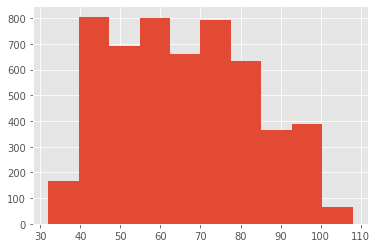

In [88]:
plt.style.use('ggplot')
plt.hist(dm_1.Age, bins=10)

(array([ 869.,    0.,    0.,    0., 4500.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 5 Patch objects>)

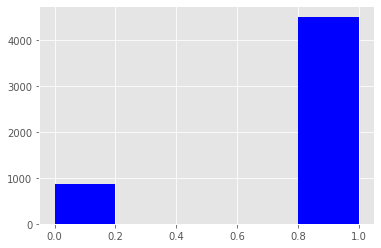

In [101]:
plt.hist(dm_1.Is_Owner, bins=5, color='blue')